In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


### Have a look at the math behind this after exams

In [2]:
mean_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1=np.random.multivariate_normal(mean_vec1,cov_mat1,100)

In [3]:
mean_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2=np.random.multivariate_normal(mean_vec2,cov_mat2,100)

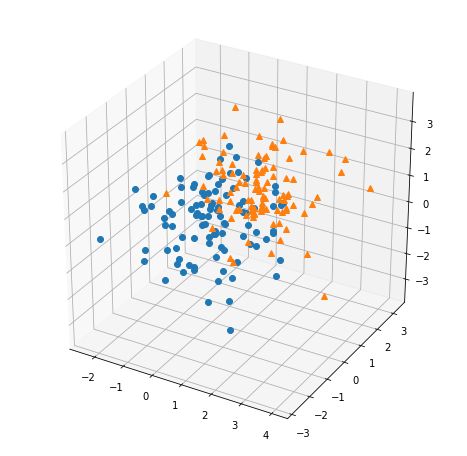

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,proj3d

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(class1[:,0],class1[:,1],class1[:,2],'o')
ax.plot(class2[:,0],class2[:,1],class2[:,2],'^')
plt.show()

In [5]:
all_data=np.concatenate((class1,class2))


In [6]:
pca=PCA(n_components=2)

transformed_data=pca.fit_transform(all_data)

pca.components_


array([[-0.57927884, -0.5655885 , -0.58698013],
       [ 0.60637155,  0.18224209, -0.77401639]])

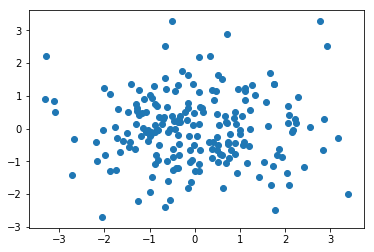

In [7]:
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.show()

In [8]:
X_approx=pca.inverse_transform(transformed_data)


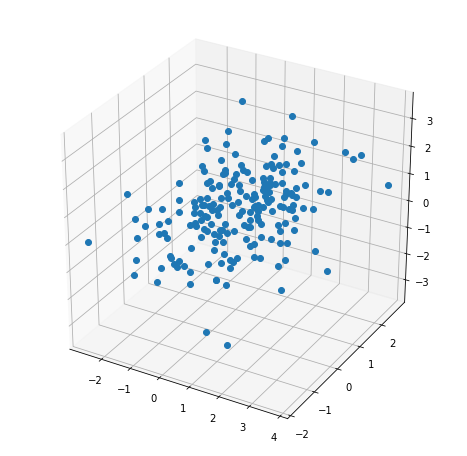

In [9]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:,0],X_approx[:,1],X_approx[:,2],'o')
plt.show()

In [15]:
cov=np.cov(all_data)
cov.shape
#the data was 200*3, but we need a 3*3 soo...

(200L, 200L)

In [17]:
all_data_t=all_data.T
cov=np.cov(all_data_t)
cov

array([[ 1.29524925,  0.26652224,  0.18971987],
       [ 0.26652224,  1.23352755,  0.232423  ],
       [ 0.18971987,  0.232423  ,  1.33653138]])

In [20]:
eig_val,eig_vectors= np.linalg.eig(cov)
eig
#values and correspong vectors
#need to sort them and sort the array2 of eigen vectors accordingly

(array([ 1.74771477,  1.13317912,  0.98441428]),
 array([[-0.57927884, -0.60637155,  0.54474725],
        [-0.5655885 , -0.18224209, -0.80429937],
        [-0.58698013,  0.77401639,  0.23738778]]))

In [23]:
eig_val_vector_pair=[]
for i in range(len(eig_val)):
    eig_vec=eig_vectors[:,i] #The ith column is the eigen vector:_
    eig_val_vector_pair.append((eig_val[i],eig_vec))

# so we have a pair of them, now just sort them

eig_val_vector_pair.sort(reverse=True)
eig_val_vector_pair


[(1.7477147710263954, array([-0.57927884, -0.5655885 , -0.58698013])),
 (1.1331791153834048, array([-0.60637155, -0.18224209,  0.77401639])),
 (0.98441428499393324, array([ 0.54474725, -0.80429937,  0.23738778]))]

In [25]:
pca.components_
# they might look a little different, if the pca picked the -ve direction of my direction


array([[-0.57927884, -0.5655885 , -0.58698013],
       [ 0.60637155,  0.18224209, -0.77401639]])

In [26]:
pca.explained_variance_ 
# this is it

array([ 1.74771477,  1.13317912])